# Introduction into Data Science - Assignment Part II

This is the second part of the assignment in IDS 2023/2024.

This part of the assignment consists of five questions — each of these questions is contained in a separate Jupyter notebook:
- [Question 1: Data Preprocessing](Q1_Preprocessing_Visualization.ipynb)
- [Question 2: Association Rules](Q2_Frequent_Itemsets_Association_Rules.ipynb)
- [Question 3: Process Mining](Q3_Process_Mining.ipynb)
- [Question 4: Text Mining](Q4_Text_Mining.ipynb)
- [Question 5: Big Data](Q5_Big_Data.ipynb)

Additional required files are in two folders.
- [datasets](datasets/)
- [scripts](scripts/)

Please use the provided notebook to work on the questions. When you are done, upload your version of each of the notebooks to Moodle. Your submission will, therefore, consist of five jupyter notebook and _no_ additional file. Any additionally provided files will not be considered in grading.
Enter your commented Python code and answers in the corresponding cells. Make sure to answer all questions in a clear and explicit manner and discuss your outputs. _Please do not change the general structure of this notebook_. You can, however, add additional markdown or code cells if necessary. Please **DO NOT CLEAR THE OUTPUT** of the notebook you are submitting! Additionally, please ensure that the code in the notebook runs if placed in the same folder as all of the provided files, delivering the same outputs as the ones you submit in the notebook. This includes being runnable in the bundled conda environment.

*Please make sure to include the names and matriculation numbers of all group members in the provided slots in each of the notebooks.* If a name or a student id is missing, the student will not receive any points.

Hint 1: **Plan your time wisely.** A few parts of this assignment may take some time to run. It might be necessary to consider time management when you plan your group work. Also, do not attempt to upload your assignment at the last minute before the deadline. This often does not work, and you will miss the deadline. Late submissions will not be considered.

Hint 2: RWTHMoodle allows multiple submissions, with every new submission overwriting the previous one. **Partial submissions are possible and encouraged.** This might be helpful in case of technical issues with RWTHMoodle, which may occur close to the deadline.

Hint 3: As a technical note. Some IDEs such as DataSpell may automatically strip jupyter notebook cell metadata. If you are able, please re-add it from the source notebooks before submission. This is necessary for our grading.

Enter your group number and members with matriculation numbers below.

In [ ]:
GROUP_NO = 112 # group number
GROUP_MEMBERS = {
    451963: "Paul Väthjunker", # mat. no. : name,
    413004: "Touyen Nguyenova"
}

---

In [3]:
# required imports
# do not edit!

import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.impute import KNNImputer

# Question 1: Preprocessing and Visualization (19 Points)

**About the Data: Heart Disease**

In this task, our data (`q1_heart_disease.csv`) contains records related to the diagnosis of heart disease in patients. It includes various clinical and non-clinical attributes used to determine the presence or absence of heart disease. Columns cover aspects like patient demographics, vital signs, symptoms, and potential risk factors associated with heart conditions. See below a short description for each column.

| Column         | Description                                                                                                                       |
|----------------|-----------------------------------------------------------------------------------------------------------------------------------|
| Age            | The age of the patient in years.                                                                                                  |
| Sex            | The sex of the patient.                                                                                                           |
| ChestPainType  | The type of chest pain (TA: Typical Angina, ATA: Atypical Angina, NAP: Non-Anginal Pain, ASY: Asymptomnic).                       |
| RestingBP      | The resting blood pressure in millimeter of mercury [mmHg].                                                                       |
| Cholesterol    | The cholesterol of the blood serum in milligrams per deciliter (mg/dl).                                                           |
| FastingBS      | 1 if the blood sugar while fasting is above 120 mg/dl, 0 otherwise.                                                               |
| RestingECG     | Results of the electrocardiogram when resting.                                                                                    |
| MaxHR          | The maximum heart rate achieved while exercising.                                                                                 |
| ExerciseAngina | If an Angina (pressure on chest) is inducible by exercising.                                                                      |
| Oldpeak        | Numerical measure of the depression of the ST segment of electrocardiogram induced by exercise relative to rest.                  |
| ST_Slope       | The slope of the peak exercise ST segment, where 0 corresponds to downsloping; 1 to a flat level, and 2 corresponds to upsloping. |
| HeartDisease   | Heart disease being present or not.                                                                                               |

## Part I: Preprocessing (11 pts)

### a)
First things first. Import the file **q1_heart_disease.csv** and save it into a dataframe named `heart_df`. Visualize the dataframe by showing the first five lines. 


In [4]:
# Import and visualization.
# YOUR CODE HERE
heart_df = pd.read_csv("datasets/q1_heart_disease.csv")

heart_df.head(5)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40.0,M,ATA,140.0,289.0,0.0,Normal,172.0,N,0.0,Up,0.0
1,49.0,F,NAP,160.0,180.0,0.0,Normal,156.0,N,1.0,Flat,1.0
2,37.0,M,ATA,130.0,283.0,0.0,ST,98.0,N,0.0,Up,0.0
3,48.0,F,ASY,138.0,214.0,0.0,Normal,108.0,Y,1.5,Flat,1.0
4,54.0,M,NAP,150.0,195.0,0.0,Normal,122.0,N,0.0,Up,0.0


### b) 
i. Check the data types. Are there any data type problems (e.g., numerical columns having a non-numerical data type)?

In [5]:
# Visualizing data types
# YOUR CODE HERE
heart_df.dtypes

Age               float64
Sex                object
ChestPainType      object
RestingBP         float64
Cholesterol       float64
FastingBS         float64
RestingECG         object
MaxHR             float64
ExerciseAngina     object
Oldpeak           float64
ST_Slope           object
HeartDisease      float64
dtype: object

ii. Fix problems, if there are any data type problems. Further, improve categorical columns by setting them to the categorical type and translate boolean columns to boolean values.

In [ ]:
# Fixing problems, if necessary
# YOUR CODE HERE

In [7]:
# Set categorical columns to categorial type.
# YOUR CODE HERE
for col in heart_df.select_dtypes(exclude="number"):
    heart_df[col]=heart_df[col].astype("category")
    

heart_df.dtypes

Age                float64
Sex               category
ChestPainType     category
RestingBP          float64
Cholesterol        float64
FastingBS          float64
RestingECG        category
MaxHR              float64
ExerciseAngina    category
Oldpeak            float64
ST_Slope          category
HeartDisease       float64
dtype: object

In [46]:

# Translate boolean columns to boolean type
# YOUR CODE HERE

heart_df["FastingBS"]=heart_df["FastingBS"].apply(lambda x: x if x is None else (False if x == 0.0 else True)).astype('bool')
heart_df["Is Female"]=heart_df["Sex"].apply(lambda x:  x if x is None else (False if x == "F" else True)).astype('bool')
heart_df=heart_df.drop(["Sex"],axis=1)
heart_df["Is Female"]=heart_df["Is Female"].astype("bool")
heart_df["HeartDisease"]=heart_df["HeartDisease"].apply(lambda x:  x if x is None else (False if x == 0.0 else True)).astype('bool')
heart_df["ExerciseAngina"]=heart_df["ExerciseAngina"].apply(lambda x: x if x is None else(False if x == 'N' else True)).astype('bool')
heart_df["ExerciseAngina"]=heart_df["ExerciseAngina"].astype('bool')
heart_df.dtypes

Age                float64
ChestPainType     category
RestingBP          float64
Cholesterol        float64
FastingBS             bool
RestingECG        category
MaxHR              float64
ExerciseAngina        bool
Oldpeak            float64
ST_Slope          category
HeartDisease          bool
Is Female             bool
dtype: object

In [47]:
# Checking again by visualizing data types
# YOUR CODE HERE
heart_df.dtypes

Age                float64
ChestPainType     category
RestingBP          float64
Cholesterol        float64
FastingBS             bool
RestingECG        category
MaxHR              float64
ExerciseAngina        bool
Oldpeak            float64
ST_Slope          category
HeartDisease          bool
Is Female             bool
dtype: object

### c)
i. In this subtask, we start with a first evaluation of our data by checking the plausibility of some entries. To make sure that we do not have a clash between intended NaN values and existing NaN values in the dataset, we first remove all NaN values. Report the number of rows containing a NaN value.

In [48]:
# YOUR CODE HERE
heart_df_clean=heart_df.dropna(axis='rows')
print("Number of rows with missing values: ",heart_df[heart_df.isna().any(axis=1)].shape[0])

Number of rows with missing values:  2


ii. To check plausibility, create boxplots for all numerical features. Reason which features have invalid or missing values. Show and report such outliers. 

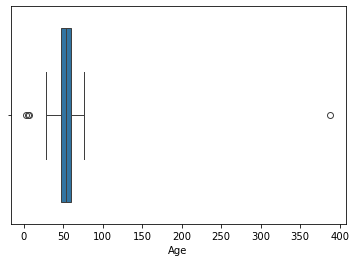

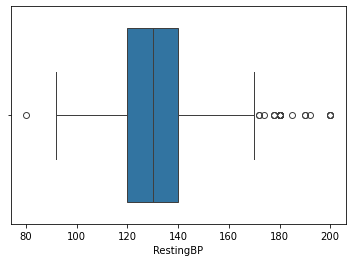

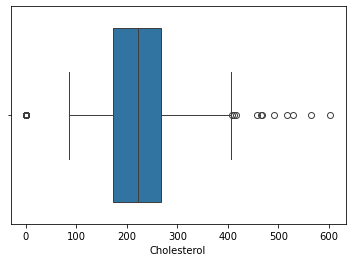

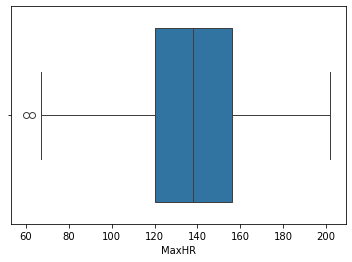

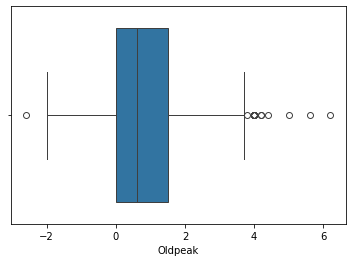

In [49]:
# Creating the boxplot and calculating outliers
# YOUR CODE HERE
for col in heart_df_clean.select_dtypes(include="number"):
    sns.boxplot(x=heart_df_clean[col])
    plt.xlabel(col)
    plt.show()

_Note: There may be more cells than what you may need for viewing and reporting the entries properly and nicely._

In [50]:
# Potential viewing and reporting of outlier entries
# YOUR CODE HERE
thirdq = heart_df_clean['Age'].quantile(0.75)
firstq = heart_df_clean['Age'].quantile(0.25)
inter=thirdq-firstq
heart_df_clean[heart_df_clean['Age'] > thirdq + 1.5 * inter]

,Age,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease,Is Female
597,388.0,ASY,160.0,256.0,True,ST,136.0,True,0.2,Up,False,True


Age of 388 is definitly impossible!

In [51]:
# Potential viewing and reporting of outlier entries
# YOUR CODE HERE
thirdq = heart_df_clean['Cholesterol'].quantile(0.75)
firstq = heart_df_clean['Cholesterol'].quantile(0.25)
inter=thirdq-firstq
heart_df_clean[heart_df_clean['Cholesterol'] < firstq - 1.5 * inter]

,Age,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease,Is Female
295,65.0,ASY,115.0,0.0,False,Normal,93.0,True,0.0,Flat,True,True
296,32.0,TA,95.0,0.0,True,Normal,127.0,True,0.7,Up,True,True
297,61.0,ASY,105.0,0.0,True,Normal,110.0,True,1.5,Up,True,True
298,50.0,ASY,145.0,0.0,True,Normal,139.0,True,0.7,Flat,True,True
299,57.0,ASY,110.0,0.0,True,ST,131.0,True,1.4,Up,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...
518,43.0,ASY,122.0,0.0,False,Normal,120.0,True,0.5,Up,True,True
519,63.0,NAP,130.0,0.0,True,ST,160.0,True,3.0,Flat,False,True
522,48.0,NAP,102.0,0.0,True,ST,110.0,True,1.0,Down,True,True
539,56.0,ASY,130.0,0.0,False,LVH,122.0,True,1.0,Flat,True,True


So is Cholesterol of 0! As Zero is used many times, this seems to be used instead of a missing Cholesterol value.

In [ ]:
# Potential viewing and reporting of outlier entries
# YOUR CODE HERE

In [ ]:
# Potential viewing and reporting of outlier entries
# YOUR CODE HERE

iii. Decide and briefly reason which entries can be kept such that some values can be imputed later and which entries have to be deleted. Apply the preprocessing by either deleting entries or by replacing values that should be imputed by setting their value to NaN respectively. Report for both processings how many entries are effected.

__Student Answer:__ Im going to delete the row with the erroneous age value, as this just looses aus a sinbgle row. The many cholesterol rows with 0 are to be kept. Although there are other outliers visible in the box plots, for me with limited medical knowledge and after a short online search these seem to be possible due to special medical conditions.

In [52]:
# Potential removing of outliers, reporting their number, and showing of the resulting dataframe
# YOUR CODE HERE
thirdq = heart_df_clean['Age'].quantile(0.75)
firstq = heart_df_clean['Age'].quantile(0.25)
inter=thirdq-firstq
print("Number of outliers:",heart_df_clean[heart_df_clean['Age'] > thirdq + 1.5 * inter].shape[0])
heart_df_clean=heart_df_clean.drop(heart_df_clean[heart_df_clean['Age'] > thirdq + 1.5 * inter].index)

Number of outliers: 1


In [53]:
# Potential replacing of values with NaN, reporting their number, and showing of the resulting dataframe
# YOUR CODE HERE
thirdq = heart_df_clean['Cholesterol'].quantile(0.75)
firstq = heart_df_clean['Cholesterol'].quantile(0.25)
inter=thirdq-firstq
print("Number of outliers:",heart_df_clean[heart_df_clean['Cholesterol'] < firstq - 1.5 * inter].shape[0])
heart_df_clean['Cholesterol']=heart_df_clean['Cholesterol'].apply(lambda x: x if x > firstq - 1.5 * inter else None)
print("Head of changed values:\n",heart_df_clean[heart_df_clean['Cholesterol'].isna()].head(5))
heart_df_clean.head(5)

Number of outliers: 172
Head of changed values:
       Age ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  MaxHR  \
295  65.0           ASY      115.0          NaN      False     Normal   93.0   
296  32.0            TA       95.0          NaN       True     Normal  127.0   
297  61.0           ASY      105.0          NaN       True     Normal  110.0   
298  50.0           ASY      145.0          NaN       True     Normal  139.0   
299  57.0           ASY      110.0          NaN       True         ST  131.0   

     ExerciseAngina  Oldpeak ST_Slope  HeartDisease  Is Female  
295            True      0.0     Flat          True       True  
296            True      0.7       Up          True       True  
297            True      1.5       Up          True       True  
298            True      0.7     Flat          True       True  
299            True      1.4       Up          True       True  


,Age,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease,Is Female
0,40.0,ATA,140.0,289.0,False,Normal,172.0,True,0.0,Up,False,True
1,49.0,NAP,160.0,180.0,False,Normal,156.0,True,1.0,Flat,True,False
2,37.0,ATA,130.0,283.0,False,ST,98.0,True,0.0,Up,False,True
3,48.0,ASY,138.0,214.0,False,Normal,108.0,True,1.5,Flat,True,False
4,54.0,NAP,150.0,195.0,False,Normal,122.0,True,0.0,Up,False,True


iv. To give yourself a better insight, plot the resulting dataframe again using boxplots.

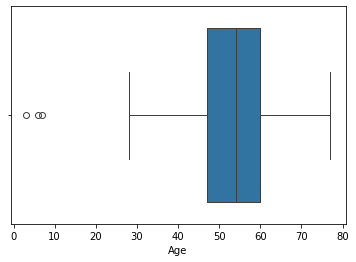

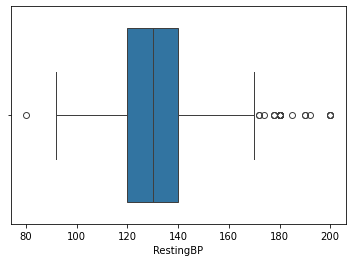

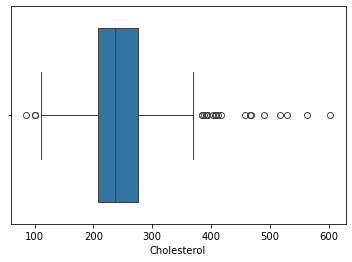

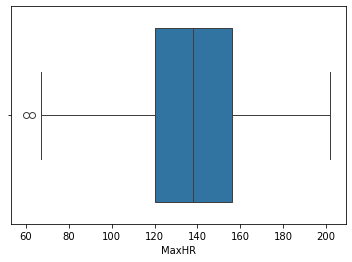

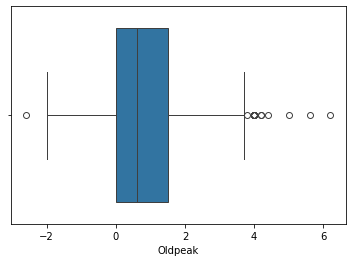

In [54]:
# Creating a boxplot
# YOUR CODE HERE
for col in heart_df_clean.select_dtypes(include="number"):
    sns.boxplot(x=heart_df_clean[col])
    plt.xlabel(col)
    plt.show()

### d)
In this task, we apply one-hot encoding for all categorical and all boolean features. This is used later for visualization. Afterwards, show the resulting dataframe.

In [55]:
heart_df_clean.head()

,Age,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease,Is Female
0,40.0,ATA,140.0,289.0,False,Normal,172.0,True,0.0,Up,False,True
1,49.0,NAP,160.0,180.0,False,Normal,156.0,True,1.0,Flat,True,False
2,37.0,ATA,130.0,283.0,False,ST,98.0,True,0.0,Up,False,True
3,48.0,ASY,138.0,214.0,False,Normal,108.0,True,1.5,Flat,True,False
4,54.0,NAP,150.0,195.0,False,Normal,122.0,True,0.0,Up,False,True


In [56]:
# Replacing categorical and boolean features with one-hot encoded columns
# YOUR CODE HERE

heart_df_hot=heart_df_clean.copy()



for col in heart_df_clean.select_dtypes(include=["category"]):
    one_hot = pd.get_dummies(heart_df_clean[col],prefix=col)
    # Drop column B as it is now encoded
    heart_df_hot = heart_df_hot.drop(col,axis = 1)
    heart_df_hot = heart_df_hot.join(one_hot)
    
heart_df_hot.head(5)

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,ExerciseAngina,Oldpeak,HeartDisease,Is Female,ChestPainType_ASY,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up
0,40.0,140.0,289.0,False,172.0,True,0.0,False,True,False,True,False,False,False,True,False,False,False,True
1,49.0,160.0,180.0,False,156.0,True,1.0,True,False,False,False,True,False,False,True,False,False,True,False
2,37.0,130.0,283.0,False,98.0,True,0.0,False,True,False,True,False,False,False,False,True,False,False,True
3,48.0,138.0,214.0,False,108.0,True,1.5,True,False,True,False,False,False,False,True,False,False,True,False
4,54.0,150.0,195.0,False,122.0,True,0.0,False,True,False,False,True,False,False,True,False,False,False,True


### e)
i. In this task, we want to impute missing values based on their k-nearest neighbor. Therefore, as a first step, create a reduced dataframe that contains the column(s) with missing values and with columns that correlate with the missing value. To decide which features (weakly) correlate, consider the correlation matrix in the figure below that is taken from literature (Source: https://www.ncbi.nlm.nih.gov/pmc/articles/PMC10417090/). Consider all features that have an absolute value for the correlation coefficient of at least 0.1 with the missing value.

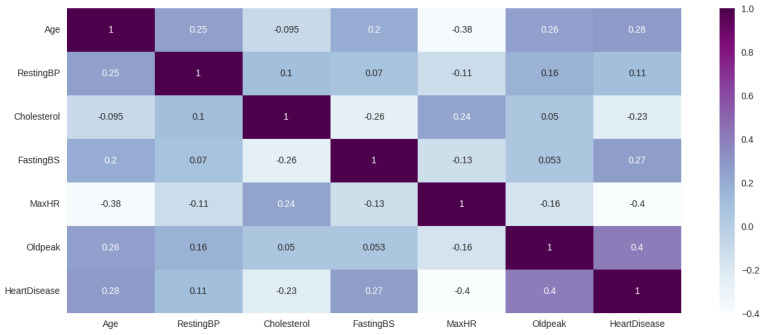

Figure 1: Correlation matrix between different features from Literature. (Source: https://www.ncbi.nlm.nih.gov/pmc/articles/PMC10417090/)

In [69]:
# Creating a dataframe with the values to be imputed and the correlating columns
# YOUR CODE HERE
heart_impute=heart_df[["Cholesterol","RestingBP","FastingBS","MaxHR","HeartDisease"]]

__Student Answer:__ Choosing 'FastingBS', 'MaxHR' and 'HeartDisease' for imputation. It should be noted however, if we want to use this dataset to predict heart disease the 'HeartDisease' should not be used for imputation, as that could introduce some artificial correlation.

ii. Next, use k-nearest neighbor imputation with $k = 5$. Impute the missing values. Update the dataframe `heart_df`.

In [70]:
# Applying k-nearest neighbor imputation
# YOUR CODE HERE
from sklearn.impute import KNNImputer


imputer = KNNImputer(n_neighbors=5)
transformed_values=imputer.fit_transform(heart_impute)

df_tmp = pd.DataFrame(transformed_values, columns=heart_impute.columns, index=heart_impute.index)
df_tmp.head(5)

,Cholesterol,RestingBP,FastingBS,MaxHR,HeartDisease
0,289.0,140.0,0.0,172.0,0.0
1,180.0,160.0,0.0,156.0,1.0
2,283.0,130.0,0.0,98.0,0.0
3,214.0,138.0,0.0,108.0,1.0
4,195.0,150.0,0.0,122.0,0.0


In [71]:
# Updating the imputed column(s)
# YOUR CODE HERE
heart_df_hot['Cholesterol']=df_tmp['Cholesterol']

## Part II: Advanced Visualization (8 pts)

In this question, we continue using the preprocessed data from Part I.

### a)
In this task, visualize the relation by plotting each pair of numerical features. Visualize the instances in the pairplots of those individuals that have and that do not have heart disease.

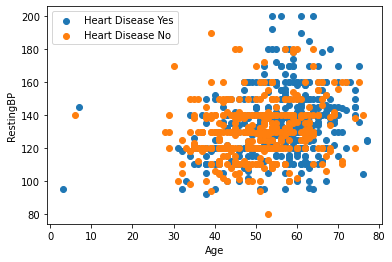

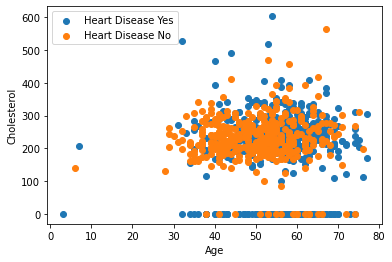

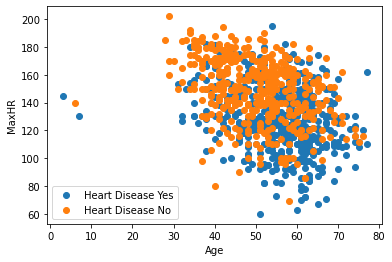

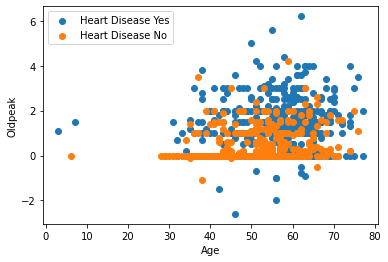

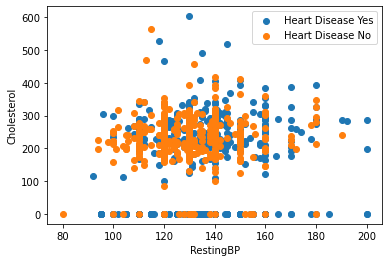

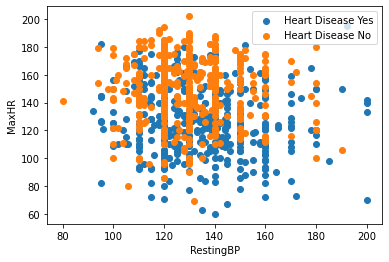

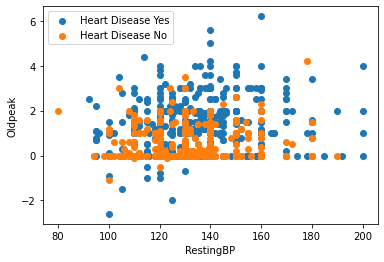

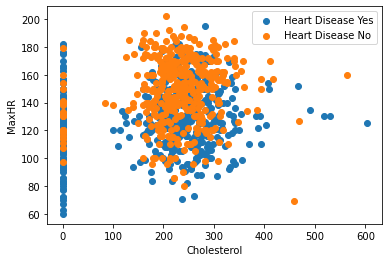

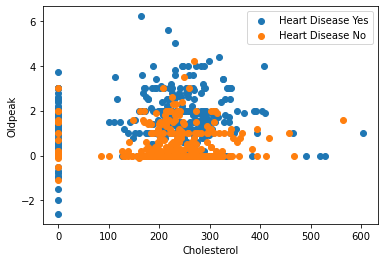

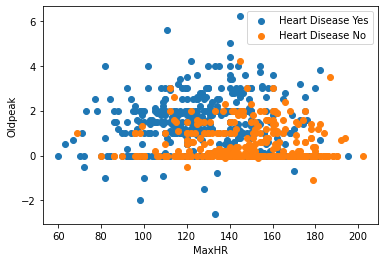

In [73]:
# Visualizing the relation between the numerical values using a pairplot, where the entries are classified by whether a heart disease is present 
# YOUR CODE HERE
numeric_cols = heart_df_hot.select_dtypes(include="number").columns
for i in range(len(numeric_cols)):
    for j in range(i+1, len(numeric_cols)):
        col1 = numeric_cols[i]
        col2 = numeric_cols[j]
        heart_disease_yes_index=heart_df_hot[heart_df_hot['HeartDisease']==True].index
        heart_disease_no_index=heart_df_hot[heart_df_hot['HeartDisease']==False].index
        plt.scatter(heart_df_hot[col1].loc[heart_disease_yes_index], 
                    heart_df_hot[col2].loc[heart_disease_yes_index], 
                    label='Heart Disease Yes')
        plt.scatter(heart_df_hot[col1].loc[heart_disease_no_index], 
                    heart_df_hot[col2].loc[heart_disease_no_index], 
                    label='Heart Disease No')

        plt.xlabel(col1)
        plt.ylabel(col2)
        plt.legend()
        plt.show()

### b)
i. Having the pairplot, we are interested in more details on the relation between the age of a patient and maximum heart rate. Therefore, create plot that shows the regression line between both features.

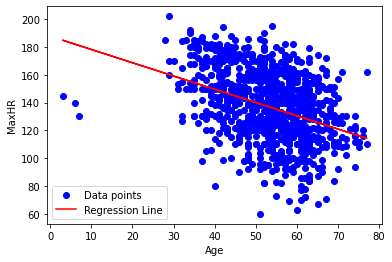

In [74]:
# Plotting age and maximum heart rate with regression line
# YOUR CODE HERE

X = heart_df_hot['Age'].values.reshape(-1, 1)
y = heart_df_hot['MaxHR'].values

# i find the following more convinient then "from sklearn.linear_model import LinearRegression"
coef = np.polyfit(heart_df_hot['Age'], heart_df_hot['MaxHR'],1)
poly1d_fn = np.poly1d(coef) 

plt.scatter(heart_df_hot['Age'], heart_df_hot['MaxHR'], color='blue', label='Data points')
plt.plot(heart_df_hot['Age'],poly1d_fn(heart_df_hot['Age']),color='red',label="Regression Line")

plt.xlabel('Age')
plt.ylabel('MaxHR')
plt.legend()
plt.show()

ii. Given our evaluation from task b-i), we are not sure if Simpson's Paradox occurs or not. Give some short reasoning, and if needed, do some experiment to check whether Simpson's Paradox occurs.

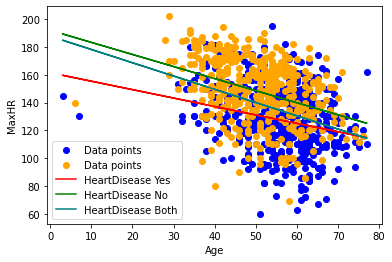

In [76]:
# Potential code for Simpson's Paradox testing
# YOUR CODE HERE

heart_disease_yes_index=heart_df_hot[heart_df_hot['HeartDisease']==True].index
heart_disease_no_index=heart_df_hot[heart_df_hot['HeartDisease']==False].index



# i find the following more convinient then "from sklearn.linear_model import LinearRegression"
coef = np.polyfit(heart_df_hot['Age'].loc[heart_disease_yes_index], heart_df_hot['MaxHR'].loc[heart_disease_yes_index],1)
poly1d_fn_yes = np.poly1d(coef)

coef = np.polyfit(heart_df_hot['Age'].loc[heart_disease_no_index], heart_df_hot['MaxHR'].loc[heart_disease_no_index],1)
poly1d_fn_no = np.poly1d(coef) 

coef = np.polyfit(heart_df_hot['Age'], heart_df_hot['MaxHR'],1)
poly1d_fn = np.poly1d(coef) 

plt.scatter(heart_df_hot['Age'].loc[heart_disease_yes_index], heart_df_hot['MaxHR'].loc[heart_disease_yes_index], color='blue', label='Data points')
plt.scatter(heart_df_hot['Age'].loc[heart_disease_no_index], heart_df_hot['MaxHR'].loc[heart_disease_no_index], color='orange', label='Data points')
plt.plot(heart_df_hot['Age'],poly1d_fn_yes(heart_df_hot['Age']),color='red',label="HeartDisease Yes")
plt.plot(heart_df_hot['Age'],poly1d_fn_no(heart_df_hot['Age']),color='green',label="HeartDisease No")
plt.plot(heart_df_hot['Age'],poly1d_fn(heart_df_hot['Age']),color='teal',label="HeartDisease Both")

plt.xlabel('Age')
plt.ylabel('MaxHR')
plt.legend()
plt.show()

In [ ]:
# Potential code for Simpson's Paradox testing
# YOUR CODE HERE

__Student Answer:__ As visible in the plot, the Simpson paradox occurs. The regression line of the data with and without heartdisease is not a convex combination of both regression lines individually.

### c)
In this task, we want to obtain a deeper understanding of the characteristics of each state of the former categorical or boolean features. Therefore, we create a heatmap that can be used to get a first impression of which value of which feature correlates with each other feature. 

i. Create a dataframe that contains as its columns the feature states and as its index all the column names of `heart_df`. Each entry is the sum of entries that have such a combination of features being true for the one-hot encoded features. For example, given the entries:
| ID | Feature1_True | Feature1_False | Feature2_StateA | Feature2_StateB | Feature2_StateC | Feature3_StateA | Feature3_StateB |
|----|---------------|----------------|-----------------|-----------------|-----------------|-----------------|-----------------|
| 1  | True          | False          | True            | False           | False           | True            | False           |
| 2  | True          | False          | False           | True            | False           | True            | False           |
| 3  | False         | True           | False           | True            | False           | True            | False           |

In this example, we would obtain the following entries as a result:

|                 | Feature1_True | Feature1_False | Feature2_StateA | Feature2_StateB | Feature2_StateC | Feature3_StateA | Feature3_StateB |
|-----------------|---------------|----------------|-----------------|-----------------|-----------------|-----------------|-----------------|
| Feature1_True   | 2             | 0              | 1               | 1               | 0               | 2               | 0               |
| Feature1_False  | 0             | 1              | 0               | 1               | 0               | 1               | 0               |
| Feature2_StateA | 1             | 0              | 1               | 0               | 0               | 1               | 0               |
| Feature2_StateB | 1             | 1              | 0               | 2               | 0               | 2               | 0               |
| Feature2_StateC | 0             | 0              | 0               | 0               | 0               | 0               | 0               |
| Feature3_StateA | 2             | 1              | 1               | 2               | 0               | 3               | 0               |
| Feature3_StateB | 0             | 0              | 0               | 0               | 0               | 0               | 0               |

In [77]:
# Creating the data for the heatmap.
# YOUR CODE HERE
df_cat_bool=heart_df_hot.copy()

for col in df_cat_bool.select_dtypes(exclude=["bool","category"]):
    df_cat_bool=df_cat_bool.drop(col,axis=1)
    
labels=list(df_cat_bool)
df=pd.DataFrame(columns=labels,index=labels)

for col1 in df_cat_bool:
    for col2 in df_cat_bool:
    
        df[col1][col2]= df_cat_bool[df_cat_bool[col1]==df_cat_bool[col2]][col1].sum()

ii. Next, create the heatmap based on the data from the last subtask. If necessary, improve readability of the visualization.

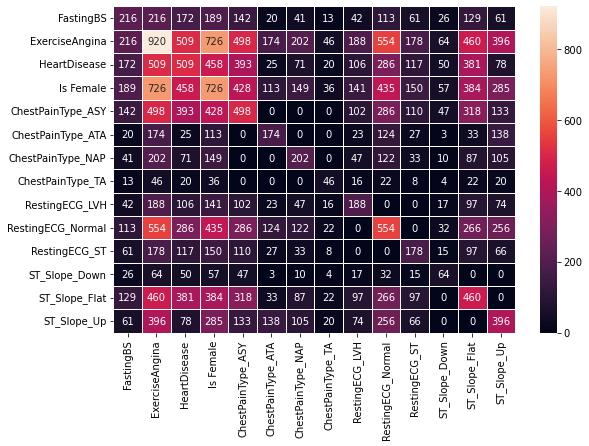

In [78]:
# Visualizing the obtained heatmap
# YOUR CODE HERE
_, ax = plt.subplots(figsize=(9, 6))
sns.heatmap(df.apply(pd.to_numeric), annot=True, fmt="d", linewidths=.5, ax=ax)

ax.tick_params(axis='x',)

Given the heatmap, briefly derive some insights towards the different values of a feature. I.e., you may choose a heart disease being present or not and argue about what correlates for the other features for each value.

__Student Answer:__ When having low Fasting Blood Sugar, the Resting ECG is often normal and there is no Exercise anigma. However, high Fasting Blood Sugar can be associated with Asymptomnic chest pain.

The most common accompanying phenomena for Heart disease are asmptomnic chest pain, low fasting blood sugar, normal resting ecg, exercise angina and flat st slope.

The chest pain categories Non-Anginal Pain and  Atypical Angina seem atypical for heart_disease and rather slighly point towards no heart disease. Typical Angina is not usually inducible by exercise.